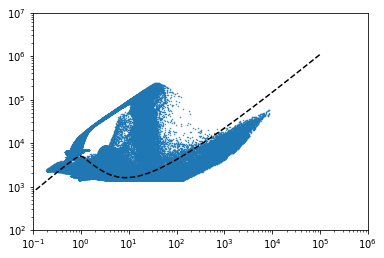

In [112]:
# encoding: utf-8

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import h5py




dir = '/Users/maeda/Desktop/'
im=128
jm=128
km=128
num=18
nstep = 20
#itime = 1
#ftime = 104
itime = 86
ftime = 86
timejump=1
    
    
#fig, ax = plt.subplots()
fig = plt.figure()
#ax = fig.add_subplot(111)
#ax1 = fig.add_subplot(111)
ax = fig.add_subplot(1,1,1)
for i in range(itime,ftime +1,timejump): #最後は含まない
    #f90 = open(dir+'All/All'+"%03.f"%(i)+'.DAT', 'rb')
    f90 = open(dir+'CLALL'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'dbug-ok/Alldphi'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'All/All'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'tag/tag'+"%03.f"%(i)+'003.DAT', 'rb')
    #f90 = open(dir+'All/All'+"%03.f"%(i)+'.DAT', 'rb')
    #f90 = open(dir+'Clmpanly/CN098001.DAT', 'rb')
    #f90 = open(dir+'AllD.DAT', 'rb')
    ary = np.fromfile(f90, np.float32,count=im*jm*km*num) #count=im*jm*dim*nstep
    #ary = np.fromfile(f90, np.int32,count=im*jm*km*num)
    #print(ary)
    uvhpy = ary.reshape(num,im,jm,km, order='F')
    #uvhpy = ary.reshape(im,jm,km,num order='F') 
    #print(uvhpy)
    
    #slice2=uvhpy[1,:,:,:]
    slice1=uvhpy[0,:,:,:]
    slice2=uvhpy[1,:,:,:]
    slice3=uvhpy[2,:,:,:]
    slice4=uvhpy[3,:,:,:]
    slice5=uvhpy[4,:,:,:]
    slice6=uvhpy[5,:,:,:]
    slice7=uvhpy[6,:,:,:]
    slice8=uvhpy[7,:,:,:]
    slice9=uvhpy[8,:,:,:]
    slice10=uvhpy[9,:,:,:]
    slice11=uvhpy[10,:,:,:]
    slice12=uvhpy[11,:,:,:]
    slice13=uvhpy[12,:,:,:]
    slice14=uvhpy[13,:,:,:]
    slice15=uvhpy[14,:,:,:]
    slice16=uvhpy[15,:,:,:]
    slice17=uvhpy[16,:,:,:]
    slice18=uvhpy[17,:,:,:]
    
    #x1=slice1.reshape(-1,-1,)
    #y1=slice5.reshape(-1,-1,)
    x1=slice1/1.27
    #y1=slice5*116.0
    y1=slice5*91.0
    
    slicehd = np.where(slice1 >= 100.0/1.27, 1, 0)
    x2=x1* slicehd 
    y2=y1* slicehd 
    
    '''
    slice01=slicehd[:,:,66]
    slice05=slice5[:,:,66]
    
    data01,data02 = np.loadtxt('/Users/maeda/Desktop/Dropbox/code/code/KIcool/KIcoolbr.dat', delimiter=',', unpack=True)
    #data02=data02*116.0
    
    x = np.arange(0, im) #x軸の描画範囲の生成。0から10まで0.05刻み。
    y = np.arange(0, jm) 
    #imshow(slice01,norm=LogNorm(vmin=1,vmax=1e6))
    #plt.pcolormesh(x,y,slice01, cmap='jet') # 等高線図の生成。cmapで色付けの規則を指定する。
    
    mappable0 = ax1.pcolormesh(x,y,slice05, cmap='coolwarm', norm=LogNorm()) # ここがポイント！
    #mappable0 = ax1.pcolormesh(x,y,slice05, cmap='coolwarm') # ここがポイント！
    pp = fig.colorbar(mappable0, ax=ax1, orientation="vertical")


    #plt.clim(1.0, 10000.0)
    #pp=plt.colorbar (orientation="vertical") # カラーバーの表示 "vertical"
    #pp.set_label("$\Phi$", fontsize=24) #カラーバーのラベル
    #plt.xlim([-0.0, 100.0]) # x方向の描画範囲を指定
    #plt.ylim([-0.0, 100.0]) # y方向の描画範囲を指定
    plt.xlabel('X', fontsize=24)
    plt.ylabel('Y', fontsize=24)
    #plt.xticks(np.arange(0, 101, step=20))
    #plt.yticks(np.arange(0, 101, step=20))
    #fig = plt.figure(figsize=(5, 5))
    #ax.set_aspect('equal', adjustable='box')
    #quadmesh.set_clim(vmin=0, vmax=15)
    #plt.axes().set_aspect('equal', 'datalim')
    plt.gca().set_aspect('equal')
    plt.savefig("slice.png")

    #pp = PdfPages('/Users/maeda/Desktop/phi'+"%03.f"%(i)+'.pdf')
   # pp = PdfPages('/Users/maeda/Desktop/rho.pdf')
    # 画像をPDFとして保存する
    #pp.savefig(fig, bbox_inches='tight')
    # PDFの保存終了
    #pp.close()


    plt.show()
    
    '''
    #ax.set_xlabel('n')  # x軸ラベル
    #ax.set_ylabel('p/k_{B}')  # y軸ラベル
    #ax.set_title(r'$\sin(x)$ and $\cos(x)$') # グラフタイトル
    # ax.set_aspect('equal') # スケールを揃える
    #ax.grid()            # 罫線
    #plt.yscale('log')
    #plt.xscale('log')
    #plt.plot(x1, y1)
    #matplotlib.pyplot.scatter
    plt.scatter(x1, y1, s=0.2)# norm=LogNorm())#, s=20)#, c=None, marker='o', cmap=None, norm=None,vmin=None, vmax=None, alpha=None, linewidths=None,verts=None, edgecolors=None, hold=None, data=None,**kwargs)
    ax.set_yscale('log')  # y軸をlogスケールで描く
    ax.set_xscale('log')  # x軸をlogスケールで描く
    ax.set_xlim([0.1, 1000000]) # x方向の描画範囲を指定
    ax.set_ylim([100, 10000000])    # y方向の描画範囲を指定
    p = plt.plot(data01,data02, "black", linestyle='dashed') # normal way
    #ax.plot(t, y1, color=c1, label=l1)
    #ax.plot(t, y2, color=c2, label=l2)
    #ax.plot(t, y3, color=c3, label=l3)
    #ax.plot(t, y4, color=c4, label=l4)
    #ax.legend(loc=0)    # 凡例
    #fig.tight_layout()  # レイアウトの設定
    # plt.savefig('hoge.png') # 画像の保存
    #plt.show()
                    
                    
    plt.savefig("foo.png")
    
    
   
      


In [113]:
rhov=0.0
v=0.0
dl=100.0/512.0
rhovx=slice1[i,j,k]*slice2[i,j,k]
rhovy=slice1[i,j,k]*slice3[i,j,k]
rhovz=slice1[i,j,k]*slice4[i,j,k]

#div=rhovx
#div=0.0
#for k in range(1, km-1, 1):

for k in range(1, km-1, 1):
    for j in range(1, jm-1, 1):
        for i in range(1, im-1, 1):
            rhov=rhov+(slice1[i+1,j,k]*slice2[i+1,j,k]-slice1[i-1,j,k]*slice2[i-1,j,k] + slice1[i,j+1,k]*slice3[i,j+1,k]-slice1[i,j-1,k]*slice3[i,j-1,k] + slice1[i,j,k+1]*slice4[i,j,k+1]-slice1[i,j,k-1]*slice4[i,j,k-1])/2.0/dl * dl * dl * dl 
            v=v+(slice2[i+1,j,k]-slice2[i-1,j,k] + slice3[i,j+1,k]-slice3[i,j-1,k] + slice4[i,j,k+1]-slice4[i,j,k-1])/2.0/dl * dl * dl * dl 
    
rhov=rhov/(dl*126.0*dl*126.0*6)
v=v/(dl*126.0*dl*126.0*6)
rho=slice1.mean()
#print(rho)
rho

20.905231

In [117]:
Bmean=0.0
v=0.0
dl=100.0/512.0

slicedenrho = np.where(slice1 >= 10000.0, 1.0, 0.0)
#Bx2=slice2[i,j,k]*slice2[i,j,k]*slicedenrho[i,j,k]
#By2=slice3[i,j,k]*slice3[i,j,k]*slicedenrho[i,j,k]
#Bz2=slice4[i,j,k]*slice4[i,j,k]*slicedenrho[i,j,k]
Bx2=slice6*slice6*slicedenrho
By2=slice7*slice7*slicedenrho
Bz2=slice8*slice8*slicedenrho

B=np.sqrt(Bx2+By2+Bz2)
Bmean=B[B >0.0].mean() / 3.545 # sqrt(4 pi) = 3.545


Bmean


34.42157097204003